CMSD Skill Check 
1. accessed all required files, renaming them to match description in the attached instructions
2. Evaluated the formatting of each table type to establish required sheets and primary keys for joins
3. save first sheet of each file as a csv for easy use as a df
4. create function to iterate over the files to filter unnecasary data and join them accordingly 
5. create subset of data in the form of pivot tables or visualization 
6. created visualization of 



In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [168]:
import pyexcel as p

In [169]:
excel_folder = 'C:\\Users\\willd\\OneDrive\\Desktop\\DataAnalysis\\python data\\CMSD test\\excels\\'
csv_path = 'C:\\Users\\willd\\OneDrive\\Desktop\\DataAnalysis\\python data\\CMSD test\\csvs\\' 

In [181]:
# save the first sheet of each workbook as a csv in a sepeate folder 
for item in os.listdir(excel_folder):
    full_path = os.path.join(excel_folder, item)
    first_sheet = pd.read_excel(full_path, sheet_name=0)
    name = item.split('.')[0]
    first_sheet.to_csv(f'{csv_path+name}.csv', index=None, header=True)


C:\Users\willd\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [182]:
# parts of the file names for itteration   'Address', 'City, State, Zip'
path = 'C:\\Users\\willd\\OneDrive\\Desktop\\DataAnalysis\\python data\\CMSD test\\csvs\\' 
rat_cols = ['Building IRN', 'Building Name', 'full_address', 'Enrollment']
ach_cols = ['Building IRN', 'Performance Index Percent']
val_cols = ['Building IRN', 'Overall Value Added Grade']

In [183]:
# get all years from folder and format as required for easy joining later 
years = []
rat_years = []
years_ach = []
for file in os.listdir(path):
    f = file.split('.')[0]
    file_year = f[-9:]
    years.append(file_year)
    rat_y = file_year.replace('_', '-')
    ach_y = rat_y.replace('-20','-')
    years_ach.append(ach_y)
    rat_years.append(rat_y)
years = list(sorted(set(years)))
rat_years = list(sorted(set(rat_years)))
years_ach = list(sorted(set(years_ach)))

In [184]:
print(years_ach)
print(rat_years)
print(years)

['2015-16', '2016-17', '2017-18']
['2015-2016', '2016-2017', '2017-2018']
['2015_2016', '2016_2017', '2017_2018']


In [185]:
# Filter functio to remove other schools and colums that are not required
def filter_df(df_df, df_cols):
    df_df = df_df[df_df["District IRN"] == 43786]
    df_df = df_df[df_cols]
    return df_df

In [186]:
list_of_df = []
for i in range(len(years)):
    
    # rating table 
    rat_df = pd.read_csv(f'{path}building_rating_{years[i]}.csv')
    rat_df = rat_df.rename(columns={f'Enrollment {rat_years[i]}': 'Enrollment'})
    rat_df['full_address'] = rat_df['Address'] + ', ' + rat_df['City, State, Zip']
    rat_df = filter_df(rat_df, rat_cols)
    rat_df['School Year'] = rat_years[i]
    
    # achievement table 
    ach_df = pd.read_csv(f'{path}building_achievement_{years[i]}.csv')
    ach_df = ach_df.rename(columns={f'Performance Index Percent {years_ach[i]}': 'Performance Index Percent'})
    ach_df = filter_df(ach_df, ach_cols)
    
    #value added table
    val_df = pd.read_csv(f'{path}value_added_{years[i]}.csv')
    val_df = filter_df(val_df, val_cols)
    
    #joining the tables
    joined_df = rat_df.join(ach_df.set_index('Building IRN'), on='Building IRN')
    joined_df = joined_df.join(val_df.set_index('Building IRN'), on='Building IRN')
    list_of_df.append(joined_df)
    
    
# concatinate all 3 data froms
all_years_df = pd.concat(list_of_df)

In [133]:
# single dataset saved as a csv 
# all_years_df.to_csv('file_name.csv', index=False)

In [187]:
all_years_df

,Building IRN,Building Name,full_address,Enrollment,School Year,Performance Index Percent,Overall Value Added Grade
447,224,Adlai Stevenson School,"18300 Woda Avenue, Cleveland, OH, 44122-6441",430,2015-2016,36.6,F
448,318,Menlo Park Academy,"14440 Triskett Rd, Cleveland, OH, 44111-2263",367,2015-2016,NaN,C
449,489,Almira,"3375 W 99th St, Cleveland, OH, 44102-4642",499,2015-2016,38.7,F
450,729,Andrew J Rickoff,"3500 E 147th St, Cleveland, OH, 44120-4834",477,2015-2016,36.9,F
451,828,Anton Grdina,"2955 E 71st St, Cleveland, OH, 44104-4101",371,2015-2016,32.4,F
...,...,...,...,...,...,...,...
3042,86306,Martin Luther King Jr. Campus,"1651 E 71st St, Cleveland, OH, 44103-4023",356,2017-2018,38.2,F
3198,133215,"Intergenerational School, The","11327 Shaker Blvd Ste 200 E., Cleveland, OH, 4...",247,2017-2018,65.7,C
3214,133520,Citizens Academy,"10118 Hampden Ave, Cleveland, OH, 44108-3538",410,2017-2018,64.5,F
3219,133629,Horizon Science Acad Cleveland,"6000 S Marginal Rd, Cleveland, OH, 44103-1042",440,2017-2018,50.1,D


In [188]:
all_years_df.drop_duplicates().shape

(356, 7)

## Further Breakedown for Analysis 


### cleaning and prep for metrics 

In [128]:
letters = ['A', 'B', 'C', 'D', 'F']
#removing nans
#removing non letter grades 
all_years_df['Performance Index Percent'] = pd.to_numeric(all_years_df['Performance Index Percent'], errors='coerce')
all_years_df.loc[~all_years_df["Overall Value Added Grade"].isin(letters), 'Overall Value Added Grade'] = ''

In [129]:
all_years_df

,Building IRN,Building Name,full_address,Enrollment,School Year,Performance Index Percent,Overall Value Added Grade
447,224,Adlai Stevenson School,"18300 Woda Avenue, Cleveland, OH, 44122-6441",430,2015-2016,36.6,F
448,318,Menlo Park Academy,"14440 Triskett Rd, Cleveland, OH, 44111-2263",367,2015-2016,NaN,C
449,489,Almira,"3375 W 99th St, Cleveland, OH, 44102-4642",499,2015-2016,38.7,F
450,729,Andrew J Rickoff,"3500 E 147th St, Cleveland, OH, 44120-4834",477,2015-2016,36.9,F
451,828,Anton Grdina,"2955 E 71st St, Cleveland, OH, 44104-4101",371,2015-2016,32.4,F
...,...,...,...,...,...,...,...
3042,86306,Martin Luther King Jr. Campus,"1651 E 71st St, Cleveland, OH, 44103-4023",356,2017-2018,38.2,F
3198,133215,"Intergenerational School, The","11327 Shaker Blvd Ste 200 E., Cleveland, OH, 4...",247,2017-2018,65.7,C
3214,133520,Citizens Academy,"10118 Hampden Ave, Cleveland, OH, 44108-3538",410,2017-2018,64.5,F
3219,133629,Horizon Science Acad Cleveland,"6000 S Marginal Rd, Cleveland, OH, 44103-1042",440,2017-2018,50.1,D


In [130]:
all_years_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 447 to 3390
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building IRN               356 non-null    int64  
 1   Building Name              356 non-null    object 
 2   full_address               356 non-null    object 
 3   Enrollment                 356 non-null    object 
 4   School Year                356 non-null    object 
 5   Performance Index Percent  336 non-null    float64
 6   Overall Value Added Grade  356 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.2+ KB


In [131]:
# df for stars for letter grades
st = {'Overall Value Added Grade': letters, 'stars' : [5, 4, 3, 2, 1]}
st_df = pd.DataFrame(data=st)
st_df

,Overall Value Added Grade,stars
0,A,5
1,B,4
2,C,3
3,D,2
4,F,1


In [132]:
#adding a numeric value for value added grades
star_join = pd.merge(all_years_df, st_df, on ='Overall Value Added Grade', how ='left')

In [133]:
star_join

,Building IRN,Building Name,full_address,Enrollment,School Year,Performance Index Percent,Overall Value Added Grade,stars
0,224,Adlai Stevenson School,"18300 Woda Avenue, Cleveland, OH, 44122-6441",430,2015-2016,36.6,F,1.0
1,318,Menlo Park Academy,"14440 Triskett Rd, Cleveland, OH, 44111-2263",367,2015-2016,NaN,C,3.0
2,489,Almira,"3375 W 99th St, Cleveland, OH, 44102-4642",499,2015-2016,38.7,F,1.0
3,729,Andrew J Rickoff,"3500 E 147th St, Cleveland, OH, 44120-4834",477,2015-2016,36.9,F,1.0
4,828,Anton Grdina,"2955 E 71st St, Cleveland, OH, 44104-4101",371,2015-2016,32.4,F,1.0
...,...,...,...,...,...,...,...,...
351,86306,Martin Luther King Jr. Campus,"1651 E 71st St, Cleveland, OH, 44103-4023",356,2017-2018,38.2,F,1.0
352,133215,"Intergenerational School, The","11327 Shaker Blvd Ste 200 E., Cleveland, OH, 4...",247,2017-2018,65.7,C,3.0
353,133520,Citizens Academy,"10118 Hampden Ave, Cleveland, OH, 44108-3538",410,2017-2018,64.5,F,1.0
354,133629,Horizon Science Acad Cleveland,"6000 S Marginal Rd, Cleveland, OH, 44103-1042",440,2017-2018,50.1,D,2.0


### Pivot tables creation ***

In [134]:
#convert df from long to wide to add culumns for metrics
df_wide = pd.pivot(star_join, index=['Building IRN','Building Name', 'full_address'], columns = 'School Year',values = 'stars')
df_wide_per = pd.pivot(star_join, index=['Building IRN','Building Name', 'full_address'], columns = 'School Year',values = 'Performance Index Percent')

In [135]:
df_wide

School Year                                                                                             2015-2016  \
Building IRN Building Name                          full_address                                                    
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441              1.0   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263              3.0   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263                 NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642                 1.0   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834                1.0   
...                                                                                                           ...   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...        3.0   
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538              1.0   
133629       Horizon Science Acad Cleveland         6000 S Marginal Rd, Cleveland, OH, 44103-1042             NaN   
147389       SuccessTech Academy School             1440 Lakeside Ave E, Cleveland, OH, 44114-1137            NaN   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051               5.0   

School Year                                                                                             2016-2017  \
Building IRN Building Name                          full_address                                                    
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441              1.0   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263              1.0   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263                 NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642                 1.0   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834                1.0   
...                                                                                                           ...   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...        3.0   
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538              NaN   
133629       Horizon Science Acad Cleveland         6000 S Marginal Rd, Cleveland, OH, 44103-1042             NaN   
147389       SuccessTech Academy School             1440 Lakeside Ave E, Cleveland, OH, 44114-1137            2.0   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051               5.0   

School Year                                                                                             2017-2018  
Building IRN Building Name                          full_address                                                   
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441              1.0  
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263              NaN  
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263                 1.0  
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642                 1.0  
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834                1.0  
...                                                                                                           ...  
133215       Intergeneration

In [136]:
df_wide_per

School Year                                                                                             2015-2016  \
Building IRN Building Name                          full_address                                                    
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441             36.6   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263              NaN   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263                 NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642                38.7   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834               36.9   
...                                                                                                           ...   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...        NaN   
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538              NaN   
133629       Horizon Science Acad Cleveland         6000 S Marginal Rd, Cleveland, OH, 44103-1042             NaN   
147389       SuccessTech Academy School             1440 Lakeside Ave E, Cleveland, OH, 44114-1137            NaN   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051              76.0   

School Year                                                                                             2016-2017  \
Building IRN Building Name                          full_address                                                    
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441             41.1   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263             88.7   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263                 NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642                39.0   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834               39.3   
...                                                                                                           ...   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...       72.2   
133520       Citizens Academy                       10118 Hampden Ave, Cleveland, OH, 44108-3538              NaN   
133629       Horizon Science Acad Cleveland         6000 S Marginal Rd, Cleveland, OH, 44103-1042             NaN   
147389       SuccessTech Academy School             1440 Lakeside Ave E, Cleveland, OH, 44114-1137           25.9   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051              78.8   

School Year                                                                                             2017-2018  
Building IRN Building Name                          full_address                                                   
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441             40.1  
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263              NaN  
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263                90.7  
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642                41.6  
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834               41.6  
...                                                                                                           ...  
133215       Intergeneration

In [137]:
df_wide = df_wide.dropna()
df_wide_per = df_wide_per.dropna()

In [138]:
print(len(df_wide))
print(len(df_wide_per))

98
91


In [139]:
df_wide_per.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 91 entries, (224, 'Adlai Stevenson School', '18300 Woda Avenue, Cleveland, OH, 44122-6441') to (147397, 'Cleveland School of Science & Medicine', '2075 Stokes Blvd, Cleveland, OH, 44106-3051')
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   2015-2016  91 non-null     float64
 1   2016-2017  91 non-null     float64
 2   2017-2018  91 non-null     float64
dtypes: float64(3)
memory usage: 17.9+ KB


In [140]:
# conditions for year 1 and 2 and final grade 
ft = rat_years[0]
lt = rat_years[-1]
perf_conditions = [
    (df_wide_per[ft] == df_wide_per[lt]) & (df_wide_per[lt] >= 70),
    (df_wide_per[ft] == df_wide_per[lt]) & (df_wide_per[lt] < 70),
    (df_wide_per[ft] < df_wide_per[lt]) & (df_wide_per[lt] >= 70),
    (df_wide_per[ft] < df_wide_per[lt]) & (df_wide_per[lt] < 70),
    (df_wide_per[ft] > df_wide_per[lt]) & (df_wide_per[lt] >= 70),
    (df_wide_per[ft] > df_wide_per[lt]) & (df_wide_per[lt] < 70)
    ]

perf_comb_values = ['No Change >= 70%', 'No Change < 70%', 'Improved >= 70%', 'Improved < 70%', 'Worse >= 70%', 'Worse < 70%']

va_conditions = [
    (df_wide[ft] == df_wide[lt]) & (df_wide[lt] >= 3),
    (df_wide[ft] == df_wide[lt]) & (df_wide[lt] < 3),
    (df_wide[ft] < df_wide[lt]) & (df_wide[lt] >= 3),
    (df_wide[ft] < df_wide[lt]) & (df_wide[lt] < 3),
    (df_wide[ft] > df_wide[lt]) & (df_wide[lt] >= 3),
    (df_wide[ft] > df_wide[lt]) & (df_wide[lt] < 3)
    ]


va_comb_values = ['No Change >= C', 'No Change < C', 'Improved >= C', 'Improved < C', 'Worse >= C', 'Worse < C']

In [141]:
# add metrics 6 catagory 
df_wide['Improvement'] = np.select(va_conditions, va_comb_values)
df_wide

C:\Users\willd\AppData\Local\Temp\ipykernel_20164\3782382324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wide['Improvement'] = np.select(va_conditions, va_comb_values)


,,School Year,2015-2016,2016-2017,2017-2018,Improvement
Building IRN,Building Name,full_address,,,,
224,Adlai Stevenson School,"18300 Woda Avenue, Cleveland, OH, 44122-6441",1.0,1.0,1.0,No Change < C
489,Almira,"3375 W 99th St, Cleveland, OH, 44102-4642",1.0,1.0,1.0,No Change < C
729,Andrew J Rickoff,"3500 E 147th St, Cleveland, OH, 44120-4834",1.0,1.0,1.0,No Change < C
828,Anton Grdina,"2955 E 71st St, Cleveland, OH, 44104-4101",1.0,1.0,1.0,No Change < C
930,Cleveland Entrepreneurship Preparatory School,"1417 E 36th St Fl 2, Cleveland, OH, 44114-4116",5.0,5.0,5.0,No Change >= C
...,...,...,...,...,...,...
65565,Marion C Seltzer Elementary School,"1468 W 98th St, Cleveland, OH, 44102-2616",1.0,1.0,1.0,No Change < C
65573,Marion-Sterling Elementary School,"3033 Central Ave, Cleveland, OH, 44115-3044",4.0,2.0,1.0,Worse < C
68221,Kenneth W Clement,"14311 Woodworth Rd, Cleveland, OH, 44112-1926",1.0,1.0,1.0,No Change < C


In [142]:
df_wide_per['Improvement'] = np.select(perf_conditions, perf_comb_values)
df_wide_per

C:\Users\willd\AppData\Local\Temp\ipykernel_20164\1518455765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wide_per['Improvement'] = np.select(perf_conditions, perf_comb_values)


,,School Year,2015-2016,2016-2017,2017-2018,Improvement
Building IRN,Building Name,full_address,,,,
224,Adlai Stevenson School,"18300 Woda Avenue, Cleveland, OH, 44122-6441",36.6,41.1,40.1,Improved < 70%
489,Almira,"3375 W 99th St, Cleveland, OH, 44102-4642",38.7,39.0,41.6,Improved < 70%
729,Andrew J Rickoff,"3500 E 147th St, Cleveland, OH, 44120-4834",36.9,39.3,41.6,Improved < 70%
828,Anton Grdina,"2955 E 71st St, Cleveland, OH, 44104-4101",32.4,33.6,35.6,Improved < 70%
1040,Artemus Ward,"4315 W 140th St, Cleveland, OH, 44135-2128",47.3,50.8,54.4,Improved < 70%
...,...,...,...,...,...,...
64576,Cleveland School Of The Arts High School,"2064 Stearns Rd, Cleveland, OH, 44106-3050",55.4,55.4,62.6,Improved < 70%
65565,Marion C Seltzer Elementary School,"1468 W 98th St, Cleveland, OH, 44102-2616",42.6,40.7,45.2,Improved < 70%
65573,Marion-Sterling Elementary School,"3033 Central Ave, Cleveland, OH, 44115-3044",41.9,40.9,44.9,Improved < 70%


### Combined Visual

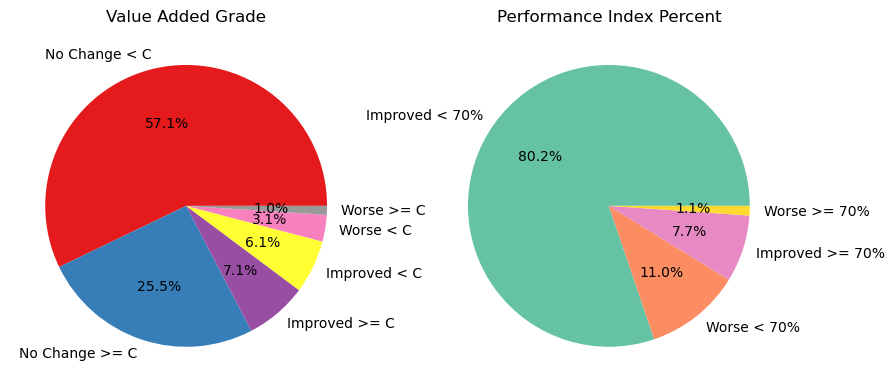

In [143]:
fig1 = plt.figure(figsize=(10,5))
# ax = fig1.add_subplot(111)
ax1 =fig1.add_subplot(121)
theme = plt.get_cmap('Set1')
ax1.set_prop_cycle("color", [theme(20. * i / len(df_wide.Improvement))
                             for i in range(len(df_wide.Improvement))])
cts = df_wide.Improvement.value_counts().to_frame()
ax1.pie(cts.Improvement, labels = df_wide['Improvement'].unique(), autopct = '%1.1f%%')
ax1.set_title('Value Added Grade')
# ax1.set_label(df_wide1['improvement'])



ax2 = fig1.add_subplot(122)
theme = plt.get_cmap('Set2')
ax2.set_prop_cycle("color", [theme(20. * i / len(df_wide_per.Improvement))
                             for i in range(len(df_wide_per.Improvement))])
cts = df_wide_per.Improvement.value_counts().to_frame()
ax2.pie(cts.Improvement, labels = df_wide_per['Improvement'].unique(), autopct = '%1.1f%%')
ax2.set_title('Performance Index Percent')

# plt.set_title('Value Added Grade 2015-2018')
plt.show()

In [144]:
writer = pd.ExcelWriter("visuals_dataset.xlsx", engine="xlsxwriter")
df_wide.to_excel(writer, sheet_name="Value_add")
df_wide_per.to_excel(writer, sheet_name="Performance_index")
writer.close()

### Value added and Performance index seperated in above and below C grade 2018

# conditions and values for performance over time 
conditions1 = [
    (df_wide[1] == df_wide[3]),
    (df_wide[1] <= df_wide[2]) & (df_wide[2] <= df_wide[3]),
    (df_wide[1] >= df_wide[2]) & (df_wide[2] >= df_wide[3]),
    (df_wide[1] > df_wide[3]),
    (df_wide[1] < df_wide[3])
    ]
values1 = ['No Change', 'Steadily Improve', 'Steadily Worse', 'Worse', 'Improve']
#coundition for contextualizing performance over time 
conditions2 = [
    (df_wide[3] >= 3),
    (df_wide[3] < 3)
    ]
values2 = ['C or Above', 'Below C']
#conditions for percentage 
conditions3 = [
    (df_wide_per[1] == df_wide_per[2]),
    (df_wide_per[1] <= df_wide_per[2]) & (df_wide_per[2] <= df_wide_per[3]),
    (df_wide_per[1] >= df_wide_per[2]) & (df_wide_per[2] >= df_wide_per[3]),
    (df_wide_per[1] > df_wide_per[3]),
    (df_wide_per[1] < df_wide_per[3])
    ]

conditions4 = [
    (df_wide_per[3] >= 70),
    (df_wide_per[3] < 70)
    ]

#### Return to pivot table creation 

df_wide['improvement'] = np.select(conditions1, values1)
df_wide['2018 Grade'] = np.select(conditions2, values2)
# df_wide.sort_values(by=['Building IRN']).head(50)

df_wide_per['improvement'] = np.select(conditions3, values1)
df_wide_per['2018 Grade'] = np.select(conditions4, values2)

df_wide[df_wide['improvement']==0]

df_wide_per[df_wide_per['Improvement'] == '0']

df_wide1 = df_wide[df_wide['2018 Grade'] == 'C or Above']
df_wide2 = df_wide[df_wide['2018 Grade'] == 'Below C']

fig1 = plt.figure(figsize=(10,5))
# ax = fig1.add_subplot(111)
ax1 =fig1.add_subplot(121)
cts = df_wide1.improvement.value_counts().to_frame()
ax1.pie(cts.improvement, labels = df_wide1['improvement'].unique())
ax1.set_title('2018 C or Above')
ax1.set_label(df_wide1['improvement'])

ax2 = fig1.add_subplot(122)
cts = df_wide2.improvement.value_counts().to_frame()
ax2.pie(cts.improvement, labels = df_wide2['improvement'].unique())
ax2.set_title('2018 Below C')

# plt.set_title('Value Added Grade 2015-2018')
plt.show()

print(str(len(df_wide1)) + ' c or Above')
print(str(len(df_wide2)) + ' Below C')

### Performance Index

#performance
df_wide_per1 = df_wide_per[df_wide_per['2018 Grade'] == 'C or Above']
df_wide_per2 = df_wide_per[df_wide_per['2018 Grade'] == 'Below C']

fig2 = plt.figure(figsize=(10,5))
# ax = fig1.add_subplot(111)
ax1 =fig2.add_subplot(121)
cts = df_wide_per1.improvement.value_counts().to_frame()
ax1.pie(cts.improvement, labels = df_wide_per1['improvement'].unique())
ax1.set_title('2018 70% or Above')
ax1.set_label(df_wide_per1['improvement'])

ax2 = fig2.add_subplot(122)
cts = df_wide_per2.improvement.value_counts().to_frame()
ax2.pie(cts.improvement, labels = df_wide_per2['improvement'].unique())
ax2.set_title('2018 Below 70%')

# plt.set_title('Value Added Grade 2015-2018')
plt.show()


print(str(len(df_wide_per1)) + ' 70% or Above')
print(str(len(df_wide_per2)) + ' Below 70%')

### export dfs for map

VA_map_df = df_wide2
Perf_map_df = df_wide_per2

writer = pd.ExcelWriter("visuals_dataset.xlsx", engine="xlsxwriter")
df_wide1.to_excel(writer, sheet_name="VA_C_above")
VA_map_df.to_excel(writer, sheet_name="VA_under_C")
df_wide_per1.to_excel(writer, sheet_name="Perf_C_above")
Perf_map_df.to_excel(writer, sheet_name="Perf_under_c")
writer.close()